In [278]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [279]:
def get_data(file):
    d=sio.loadmat(file)
    return d['X'],d['y'],d['Xval'],d['yval'],d['Xtest'],d['ytest']

In [280]:
def hyp(theta,X):
    return np.dot(X,theta)

In [281]:
def cost(X,Y,theta,lamda=0):
    m=Y.size
    return ((1.0 / (2.0 * m)) * np.sum(np.square(hyp(theta,X)-Y))) + ((lamda / (2.0 * m)) * np.sum(theta[1:]))

In [282]:
def grad(X,Y,theta,lamda=0):
    m=Y.shape[0]
    return ((1.0/m)*np.dot(X.T,(hyp(theta,X)-Y))) + ((lamda / m) * np.sum(theta[1:]))

In [283]:
def update(X,Y,theta,num_iter,alpha=0.01,lamda=0,debug=False):
    costhist=[]
    for i in range(num_iter):
        theta = theta - (alpha * grad(X,Y,theta,lamda=0))
        c=cost(X,Y,theta,lamda)
        costhist.append(c)
        if debug :
            print("Cost after " ,i," is ",c)
    return theta,costhist

In [284]:
def learning_curve(X,Y,Xval,Yval,lamda=0):
    t_e=[]
    v_e=[]
    theta=np.ones((X.shape[1],1))
    for i in range(1,Y.size+1):
        X_train,Y_train=X[:i],Y[:i]

        trained_theta,_=update(X_train,Y_train,theta,10000,0.001,lamda)
        t_er=cost(X_train,Y_train,trained_theta,lamda)

        #Xval1=np.hstack((np.ones((Xval.shape[0],1)),Xval))
        v_er=cost(Xval,Yval,trained_theta,lamda)

        t_e.append(t_er)
        v_e.append(v_er)
    plt.plot(t_e)
    plt.plot(v_e)
    plt.show()

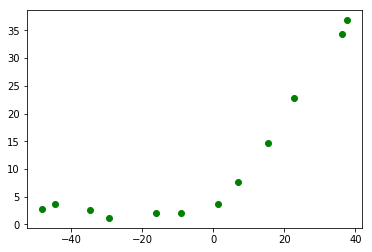

Cost :  303.9515255535976
Grad :  [[-15.30301567]
 [598.16741084]]
Cost :  22.373906761103264


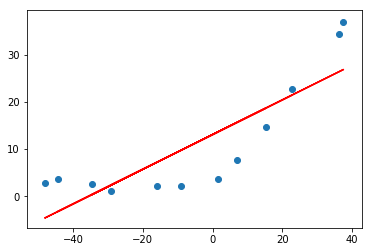

In [285]:
X,Y,Xval,Yval,Xtest,Ytest=get_data('../machine-learning-ex5/ex5/ex5data1.mat')
plt.plot(X,Y,'go')
plt.show()

X1=np.hstack((np.ones((X.shape[0],1)),X))
theta=np.ones((2,1))
print('Cost : ',cost(X1,Y,theta,0))
print('Grad : ',grad(X1,Y,theta,0))

theta,_=update(X1,Y,theta,10000,0.001,debug=False)
print('Cost : ',cost(X1,Y,theta))

plt.plot(X1[:,1].T,hyp(theta,X1),'r-')
plt.scatter(X1[:,1],Y)
plt.show()

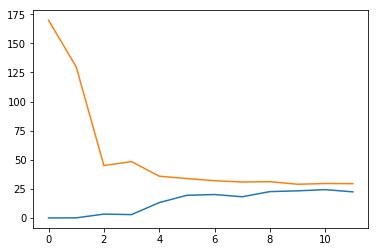

In [286]:
X_val=polyFeatures(Xval,1)
learning_curve(X1,Y,X_val,Yval)

# Polynomial Regression

In [287]:
def polyFeatures(X,p):
    xx=np.ones((X.shape[0],1))
    for i in range(1,p+1):
        xx=np.hstack((xx,X**i))
    return xx

In [288]:
def normalize(X):
    return (X-np.mean(X))/np.std(X)

In [289]:
polyFeatures(X,4).shape

(12, 5)

Cost :  93.06341791682975
Grad :  [[  2.86085269]
 [  2.99970295]
 [ 11.24731481]
 [  9.15973099]
 [ 26.84172142]
 [ 21.39217283]
 [ 59.87139515]
 [ 47.13640499]
 [131.06632987]]
Cost :  0.06486099836396474


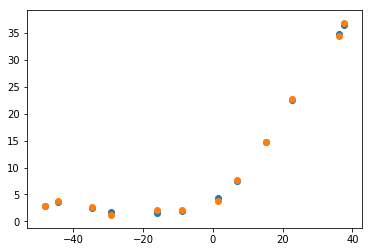

In [290]:
X_norm=normalize(X)
X8=polyFeatures(X_norm,8)

theta=np.ones((X8.shape[1],1))
print('Cost : ',cost(X8,Y,theta,0))
print('Grad : ',grad(X8,Y,theta,0))

theta,_=update(X8,Y,theta,100000,0.01,debug=False)
print('Cost : ',cost(X8,Y,theta))

plt.scatter(X,hyp(theta,X8))
plt.scatter(X,Y)
plt.show()

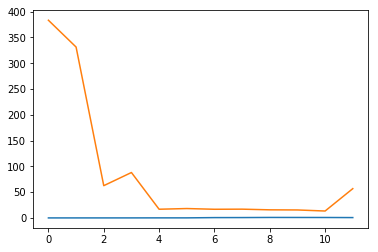

In [291]:
Xval_norm=normalize(Xval)
X8_val=polyFeatures(Xval_norm,8)
learning_curve(X8,Y,X8_val,Yval)

# Regularisaion

Cost :  93.39675125016308
Grad :  [[  3.52751936]
 [  3.66636962]
 [ 11.91398147]
 [  9.82639765]
 [ 27.50838809]
 [ 22.05883949]
 [ 60.53806182]
 [ 47.80307166]
 [131.73299654]]
Cost :  1.1080450643376873


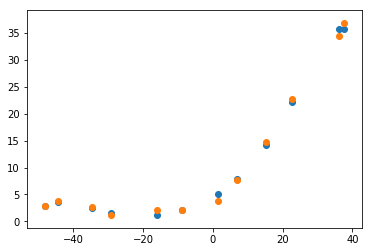

In [292]:
X_norm=normalize(X)
X8=polyFeatures(X_norm,8)

theta=np.ones((X8.shape[1],1))
print('Cost : ',cost(X8,Y,theta,1))
print('Grad : ',grad(X8,Y,theta,1))

theta,_=update(X8,Y,theta,10000,0.01,lamda=1,debug=False)
print('Cost : ',cost(X8,Y,theta,1))

plt.scatter(X,hyp(theta,X8))
plt.scatter(X,Y)
plt.show()

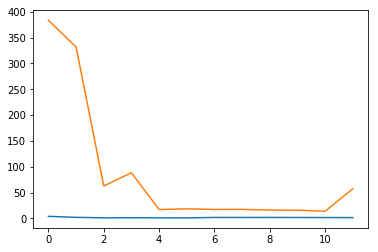

In [295]:
Xval_norm=normalize(Xval)
X8_val=polyFeatures(Xval_norm,8)
learning_curve(X8,Y,X8_val,Yval,1)

Cost :  126.39675125016308
Grad :  [[ 69.52751936]
 [ 69.66636962]
 [ 77.91398147]
 [ 75.82639765]
 [ 93.50838809]
 [ 88.05883949]
 [126.53806182]
 [113.80307166]
 [197.73299654]]
Cost :  84.8928612111415


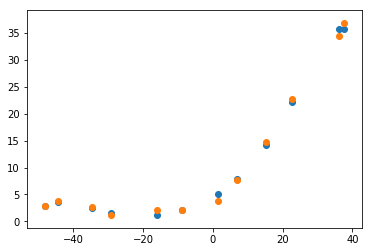

In [300]:
X_norm=normalize(X)
X8=polyFeatures(X_norm,8)

theta=np.ones((X8.shape[1],1))
print('Cost : ',cost(X8,Y,theta,100))
print('Grad : ',grad(X8,Y,theta,100))

theta,_=update(X8,Y,theta,10000,0.01,lamda=100,debug=False)
print('Cost : ',cost(X8,Y,theta,100))

plt.scatter(X,hyp(theta,X8))
plt.scatter(X,Y)
plt.show()